# Examen 1 - Portafolios de inversión. Tipo 3
.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## I. Primera parte (50%)

**Pregunta 1.** 

***Cuando la cantidad de activos es suficientemente grande la varianza del portafolio tiende a la covarianza entre pares de activos***

Explique porque el enunciado anterior es verdad

Primero se debe de ver la fórmula de varianza para portafolios de distintos activos.

* 2 activos: $ \sigma_p^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \sigma_{12} $
* 3 activos: $ \sigma_p^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + w_3^2 \sigma_3^2 + 2w_1w_2\sigma_{12} + 2w_1w_3\sigma_{13} + 2w_2w_3\sigma_{23} $
* 4 activos: $ \sigma_p^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + w_3^2 \sigma_3^2 + w_4^2 \sigma_4^2 + 2w_1w_2\sigma_{12} + 2w_1w_3\sigma_{13} + 2w_1w_4\sigma_{14} + 2w_2w_3\sigma_{23} + 2w_2w_4\sigma_{24} + 2w_3w_4\sigma_{34}
$

Como pudimos observar, mientras se agregan activos al portafolio también se agregan covarianzas a la fórmula. Por cada activo que se agrega también se agrega una varianza ($ \sigma^2 $), pero por cada activo que se incluye en el portafolio se agregan al menos 2 covarianzas a la fórmula ($ \sigma_{ab} $).

Por lo tanto a medida que agregamos activos, la cantidad de covarianzas aumenta mucho más rápido que la de varianzas, por lo que si la cantidad de activos es muy grande entonces hay muchas más covarianzas que varianzas entonces la parte de covarianzas entre activos tiene mucho más peso en la fórmula lo cual hace que la varianza del portafolio tienda a estás covarianzas entre activos.

**Pregunta 2.**

¿Qué es el R2 en una regresión lineal? Explicaselo a tu yo de primer semestre

$$\frac{errorPromedio - ErrorModelo}{ErrorPromedio} $$


Imaginemos que tienes una gráfica con muchos puntos y cada punto tiene un valor de $x$ y un valor de $y$. Después sacas el promedio de los valores de $y$ de los puntos de la gráfica lo cual arroja un número y este valor lo graficas (Ejemplo: $y = 36$).

Después obtienes una ecuación lineal ($y = mx + b$) que se ajuste a los puntos que tienes. Tanto el promedio como la ecuación lineal que ajustas tienen un error en relación a los puntos. Como se muestra en la fórmula $R^2$ es el cambio porcentual entre el error promedio y el error que tiene la ecuación lineal. Esto muestra qué tanto mejora el modelo contra el promedio porcentualmenete. Si $R^2 = 0.6$ entonces el modelo es 60% mejor que el modelo del promedio de los datos.

**Pregunta 3**

¿Cómo le hago para pasar de covarianza a correlación? ¿Por qué la formula es así?

Es un despeje donde,

$$\rho_{12} = \frac{\sigma_{12}}{\sigma_1\sigma_2}$$

Aquí se divide la covarianza de ambos activos entre la multiplicación de la desviación estándar de cada activo.

La fórmula es así debido a como se construyen la fórmula de varianza y covarianza.

* Fórmula de varianza: $Var(x) = E[(x - E[x])^2]$

* Fórmula de covarianza: $cov(x_1, x_2) = E[(x_1 - E[x_1])(x_2 - E[x_2])]$

Si $\sigma_1 = \sigma_2$ entonces es el mismo activo y la multiplicaión que está en el denominador pasa de $\sigma_1 \sigma_2$ a ser $\sigma_1^2$ lo cual es la varianza.

Después si analizamos la fórmula de covarianza, si es el mismo activo entonces 

$$cov(x_1, x_1) = E[(x_1 - E[x_1])(x_1 - E[x_1])]$$
$$cov(x_1, x_1) = E[(x_1 - E[x_1])^2]$$


Si esto pasa entonces la covarianza es igual a la varianza, por lo que al hacer la divisón el coeficiente de correlación ($\rho_{12}$) sería igual a 1 y si la covarianza es negativa sería -1, lo cual hace que tenga un rango de 1 a -1 normalizando así el resultado de covarianza permitiendo su interpretación como coeficiente de correlación.

**Pregunta 4.** 

Imaginate que tienes 3 activos. A, B y C. Tienes 3 escenarios para la economía

Inventa un ejemplo donde inviertas en A, B y C (10%, 20% y 70% respectivamente) tu tienes que crear los rendimientos hipoteticos. Calcula la varianza y rendimiento esperado de este portafolio. 


In [2]:
tabla = pd.DataFrame(columns=['Prob', 'A', 'B', 'C'], 
                     index=['Expansion', 'Normal','Depresion'])
tabla.index.name = 'Estado'
tabla['Prob']=np.array([0.4, 0.4, 0.2])
tabla['A']=np.array([0.065, 0.060, 0.045])
tabla['B']=np.array([0.050, 0.040, 0.020])
tabla['C']=np.array([0.035, 0.01, -0.02])

tabla.round(4)

,Prob,A,B,C
Estado,,,,
Expansion,0.4,0.065,0.05,0.035
Normal,0.4,0.060,0.04,0.010
Depresion,0.2,0.045,0.02,-0.020


In [3]:
## Rendimientos esperados

erA = (tabla.A * tabla.Prob).sum()

erB = (tabla.B * tabla.Prob).sum()

erC = (tabla.C * tabla.Prob).sum()

erA, erB, erC

(0.059000000000000004, 0.04000000000000001, 0.014000000000000002)

In [4]:
## Volatilidad

var_A = (tabla.Prob * (tabla.A - erA)**2).sum()
vol_A = np.sqrt(var_A)

var_B = (tabla.Prob * (tabla.B - erB)**2).sum()
vol_B = np.sqrt(var_B)

var_C = (tabla.Prob * (tabla.C - erC)**2).sum()
vol_C = np.sqrt(var_C)

vol_A, vol_B, vol_C

(0.007348469228349535, 0.010954451150103323, 0.020346989949375806)

In [5]:
erP = 0.1 * erA + 0.2 * erB + 0.7 * erC
erP

0.023700000000000006

In [6]:
cov_AB = (tabla.Prob * (tabla.A - erA) * (tabla.B - erB)).sum()
cov_AC = (tabla.Prob * (tabla.A - erA) * (tabla.C - erC)).sum()
cov_BC = (tabla.Prob * (tabla.B - erB) * (tabla.C - erC)).sum()


cov_AB, cov_AC, cov_BC

(8.000000000000002e-05, 0.00014400000000000006, 0.00022000000000000006)

In [7]:
w1 = 0.1
w2 = 0.2
w3 = 0.7

varP = w1**2 * vol_A**2 + w2**2 * vol_B**2 + w3**2 * vol_C**2 + 2*w1*w2*cov_AB + 2*w1*w3*cov_AC + 2*w2*w3*cov_BC
volP = np.sqrt(varP)
varP, volP

(0.00029316, 0.017121915780659594)

# Respuestas

* Rendimiento esperado: 2.37%
* Varianza de portafolio: 0.0002931

**Pregunta 5.** 
- ¿Cuanto dinero hubieras ganado si en 2020 a la fecha inviertes $1,000 en Tesla?
- ¿Dame el rendimiento anualizado en una cifra resumida? "El rendimiento anual de tesla es X%"



In [8]:
tickers = ['TSLA', 'VOO']
start_date = '2020-01-01'
end_date = '2024-02-28'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
St

[*********************100%%**********************]  2 of 2 completed


,TSLA,VOO
Date,,
2020-01-02,28.684000,278.849640
2020-01-03,29.534000,276.812622
2020-01-06,30.102667,277.849701
2020-01-07,31.270666,277.083527
2020-01-08,32.809334,278.513184
...,...,...
2024-02-21,194.770004,455.505157
2024-02-22,197.410004,465.074402
2024-02-23,191.970001,465.283722


In [9]:
rt2 = St.pct_change().dropna()

In [10]:
# Rendimiento aritmético
ra = St.TSLA.iloc[-1]/St.TSLA[0]-1
ra

5.963115172963685

In [11]:
# Rendimiento geometrico
rg_diario = (1 + rt2.TSLA).prod()**(1/len(St)) - 1

rg_anual = rg_diario * 252
rg_anual

0.4684137421427108

In [12]:
St.TSLA.iloc[0] * (1+rg_diario) ** len(St)

199.72999572755347

In [13]:
1000*(1+ra)

6963.115172963685

In [14]:
1000*(1+rg_diario)**len(St)

6963.115172964188

# Respuestas

Hubieras ganado $6963.11.

El rendimiento anual de tesla es 46.84%

___
## II. Segunda parte (50%)

En lo que llevamos del curso hemos hablado que la teoría de portafolios moderna tiene que ver con un concepto base principal: **la diversificación**.

Baje las siguientes acciones desde 2015 a la fecha:
- JP morgan
- Walmart
- Costco
- Microsoft
- Tesla

5% Obtenga el rendimiento geometrico y aritmetico de cada una

In [15]:
tickers = ['JPM','WMT','COST','MSFT','TSLA']
start_date = '2015-01-01'
end_date = '2024-02-28'
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [16]:
rt = df.pct_change().dropna()

In [17]:
ra_JPM = df.JPM.iloc[-1]/df.JPM[0]-1
ra_WMT = df.WMT.iloc[-1]/df.WMT[0]-1
ra_COST = df.COST.iloc[-1]/df.COST[0]-1
ra_MSFT = df.MSFT.iloc[-1]/df.MSFT[0]-1
ra_TSLA = df.TSLA.iloc[-1]/df.TSLA[0]-1

ra_JPM, ra_WMT, ra_COST, ra_MSFT, ra_TSLA

(2.778588443396879,
 1.5119649657592928,
 5.4626868487988025,
 9.091618534271616,
 12.660798749921808)

# Rendimiento Aritmético

* JPM: 277.85%
* WMT: 151.19%
* COST: 546.26%
* MSFT: 909.16%
* TSLA: 1266.07%

In [18]:
rg_diario_JPM = (1 + rt.JPM).prod()**(1/len(df)) - 1
rg_diario_WMT = (1 + rt.WMT).prod()**(1/len(df)) - 1
rg_diario_COST = (1 + rt.COST).prod()**(1/len(df)) - 1
rg_diario_MSFT = (1 + rt.MSFT).prod()**(1/len(df)) - 1
rg_diario_TSLA = (1 + rt.TSLA).prod()**(1/len(df)) - 1

rg_anual_JPM = rg_diario_JPM * 252
rg_anual_WMT = rg_diario_WMT * 252
rg_anual_COST = rg_diario_COST * 252
rg_anual_MSFT = rg_diario_MSFT * 252
rg_anual_TSLA = rg_diario_TSLA * 252

rg_anual_JPM, rg_anual_WMT, rg_anual_COST, rg_anual_MSFT, rg_anual_TSLA

(0.14550283626120386,
 0.10080541777443397,
 0.20427005696428058,
 0.2530795449364165,
 0.28625088023004963)

# Rendimiento Geométrico

* JPM: 14.55%
* WMT: 10.08%
* COST: 20.42%
* MSFT: 25.30%
* TSLA: 28.62%


5%, Grafique cada una de las acciones, eje X volatilidad, eje Y valor esperado


In [19]:
info = pd.DataFrame({
    'Volatilidad' : rt.std() * np.sqrt(252),
    'Rendimiento' : rt.mean() * 252
})
info

,Volatilidad,Rendimiento
COST,0.217395,0.228032
JPM,0.275835,0.183507
MSFT,0.276929,0.291486
TSLA,0.562900,0.444515
WMT,0.213659,0.123675


Text(0, 0.5, 'Rendimiento')

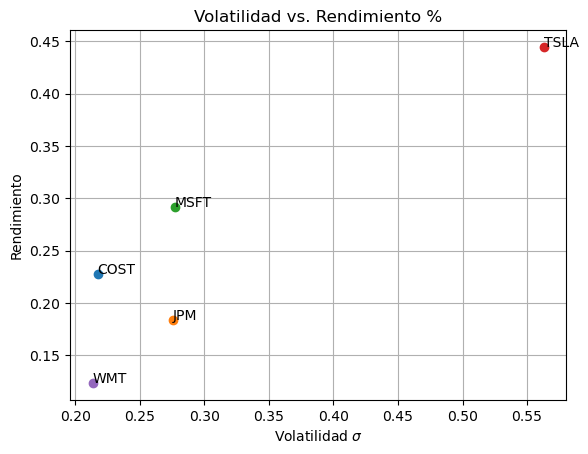

In [20]:
for i in range(len(info)):
    flag = info.iloc[i]
    plt.scatter(flag.Volatilidad, flag.Rendimiento)
    plt.text(flag.Volatilidad, flag.Rendimiento, info.index[i])
plt.grid()
plt.title('Volatilidad vs. Rendimiento %')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento')

20% Crea 10000 portafolios con los 3 ETF's y grafique los resultados

In [21]:
def random_portafolio(returns):
    def rand_weights(n):
        k = np.random.rand(n)
        return k / sum(k)
    # Definimos las constantes
    means = rt.mean()
    sigma = returns.cov()
    # Obtenemos pesos
    n_act = len(rt.keys())
    w = rand_weights(n_act)
    # Rendimiento esperado anual
    re = w.dot(means)
    # Varianza
    var = w.dot(sigma).dot(w)
    vol = np.sqrt(var)
    # Retorna rendimiento esperado, volatilidad y pesos
    return re * 252, vol * np.sqrt(252), w


random_portafolio(rt)

(0.2805788752345203,
 0.26290344052379294,
 array([0.06311325, 0.36258668, 0.18858084, 0.30226024, 0.08345899]))

In [22]:
valores_esperados = []
volatilidades = []
pesos = []
for i in range(10000):
    ve_i, vol_i, pesos_i = random_portafolio(rt)
    
    valores_esperados.append(ve_i)
    volatilidades.append(vol_i)
    pesos.append(pesos_i)
    
port = pd.DataFrame({
    'w': pesos,
    'rendimiento_esperado': valores_esperados,
    'volatilidad': volatilidades
})
portafolio_varianza_minima = port[port.volatilidad == port.volatilidad.min()]
port

,w,rendimiento_esperado,volatilidad
0,"[0.25849911710937384, 0.05291909369162927, 0.2...",0.292846,0.253626
1,"[0.3159654763774155, 0.1084835826119481, 0.172...",0.261775,0.220189
2,"[0.19114592804834926, 0.1657737620082238, 0.26...",0.300400,0.266046
3,"[0.3950307162922008, 0.174313426914085, 0.1876...",0.279753,0.232406
4,"[0.05864404072348781, 0.26863536648938346, 0.1...",0.306164,0.297247
...,...,...,...
9995,"[0.454675791643, 0.04500693841904976, 0.180025...",0.303339,0.260185
9996,"[0.31807219056451336, 0.27139192023455444, 0.2...",0.216548,0.186947
9997,"[0.12400720793169116, 0.05875792382796668, 0.1...",0.308012,0.296370
9998,"[0.32749986047807017, 0.3714578661593818, 0.01...",0.230213,0.205035


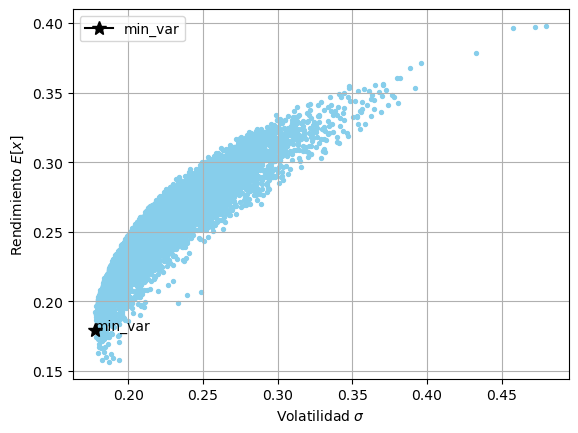

In [23]:
plt.scatter(port.volatilidad, port.rendimiento_esperado, c = 'skyblue', s = 8)
plt.plot(portafolio_varianza_minima.volatilidad, portafolio_varianza_minima.rendimiento_esperado, marker = '*',
        ms= 10, c= 'black', label = 'min_var')
plt.text(portafolio_varianza_minima.volatilidad, portafolio_varianza_minima.rendimiento_esperado, 'min_var')

plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')
plt.legend()
plt.grid()

10% ¿Cuál es el portafolio de mínima varianza?

In [24]:
min_var = port[port.volatilidad == port.volatilidad.min()]
min_var['w'].values

array([array([0.32500136, 0.21893112, 0.02379505, 0.01473476, 0.41753771])],
      dtype=object)

In [25]:
portafolio_varianza_minima = port[port.volatilidad == port.volatilidad.min()]
portafolio_varianza_minima

,w,rendimiento_esperado,volatilidad
6744,"[0.32500135932594204, 0.2189311177651725, 0.02...",0.179411,0.177694


# Portafolio mínima varianza

In [26]:
print(min_var['w'].values[0][0] * 100, '% en JPM')
print(min_var['w'].values[0][1] * 100, '% en WMT')
print(min_var['w'].values[0][2] * 100, '% en COST')
print(min_var['w'].values[0][3] * 100, '% en MSFT')
print(min_var['w'].values[0][4] * 100, '% en TSLA')
print('Ofreciendo un', portafolio_varianza_minima['rendimiento_esperado'].values[0]*100,
      '% de rendimiento y una volatilidad de', portafolio_varianza_minima['volatilidad'].values[0]*100, '%')


32.500135932594205 % en JPM
21.893111776517248 % en WMT
2.3795049957194596 % en COST
1.4734760659808586 % en MSFT
41.75377122918823 % en TSLA
Ofreciendo un 17.94108179794484 % de rendimiento y una volatilidad de 17.769365329934406 %


10% crea una regresión lineal con estos activos volatilidad anual vs rendiiento anual, dame el r2 y la ecuación

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
df_regresion = pd.DataFrame({
    'valor_esperado': rt.mean() * 252,
    'volatilidad': rt.std() * np.sqrt(252)
})

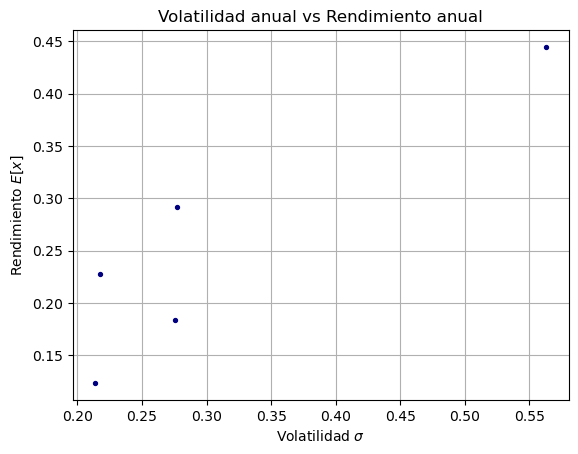

In [29]:
plt.scatter(df_regresion.volatilidad, df_regresion.valor_esperado, c = 'navy', s = 8)
plt.title('Volatilidad anual vs Rendimiento anual')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')

plt.grid()

In [30]:
model = LinearRegression()
X = df_regresion[['volatilidad']]
y = df_regresion[['valor_esperado']]

model.fit(X,y)

LinearRegression()

In [31]:
model.intercept_

array([0.01761636])

In [32]:
model.coef_

array([[0.76493178]])

# Ecuación

$$ 0.7649 \sigma + 0.0176 $$

In [33]:
df_regresion['predicciones'] = model.predict(X)

# Regresión Lineal

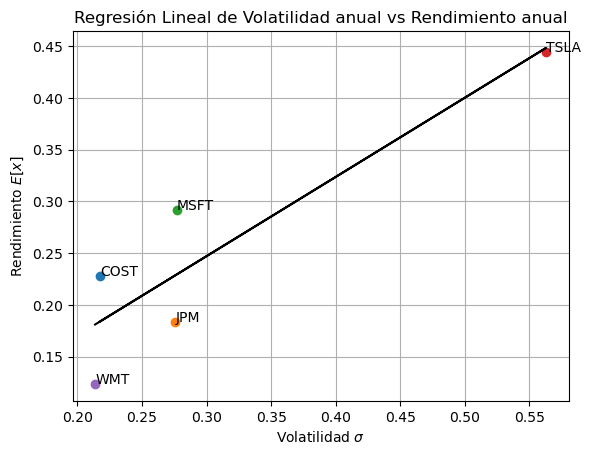

In [34]:
plt.plot(df_regresion.volatilidad, df_regresion.predicciones, c = 'black')
plt.title('Regresión Lineal de Volatilidad anual vs Rendimiento anual')

plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')

for i in range(len(info)):
    flag = info.iloc[i]
    plt.scatter(flag.Volatilidad, flag.Rendimiento)
    plt.text(flag.Volatilidad, flag.Rendimiento, info.index[i])

plt.grid()

In [35]:
error_modelo = np.var(df_regresion['predicciones'] - df_regresion['valor_esperado'])
error_promedio = np.var(df_regresion['valor_esperado'].mean() - df_regresion['valor_esperado'])

In [36]:
(error_promedio - error_modelo)/error_promedio

0.8154202357507325

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_true = y, y_pred=df_regresion['predicciones'])

0.8154202357507325

# R2

In [39]:
print(r2_score(y_true = y, y_pred=df_regresion['predicciones']))

0.8154202357507325
